In [1]:
# 建立数据集合
import torch
import matplotlib.pyplot as plt

# 假数据
n_data = torch.ones(100,2)
# means = 2,std = 1 shape (100,2)
x0 = torch.normal(2 * n_data,1)
# shape (100,)
y0 = torch.zeros(100)

# means = -2,std = 1,shape = (100,2)
x1 = torch.normal(-2 * n_data,1)
y1 = torch.ones(100)

# 合并数据
# 32-bit floating
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)

In [2]:
print(x.size())

torch.Size([200, 2])


In [3]:
print(y.size())

torch.Size([200])


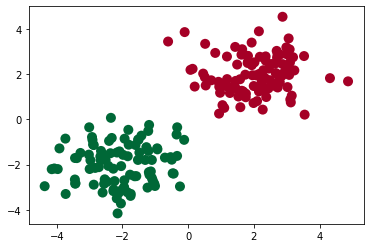

In [4]:
# 画图
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c = y.data.numpy(),s= 100,lw=0,cmap='RdYlGn')
plt.show()

In [5]:
# 建立神经网络
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.out = torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        x = torch.relu(self.hidden(x))
        x = self.out(x)
        return x

In [6]:
net = Net(n_feature=2,n_hidden=10,n_output=2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


/home/fengjiaxin/fengjiaxin/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


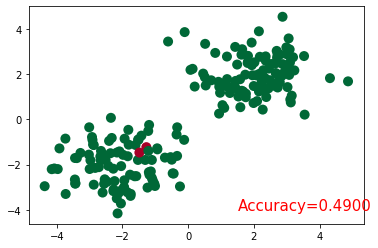

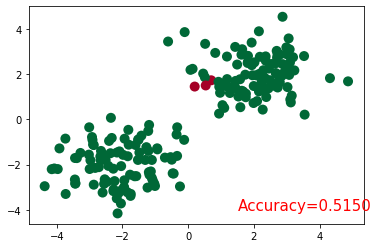

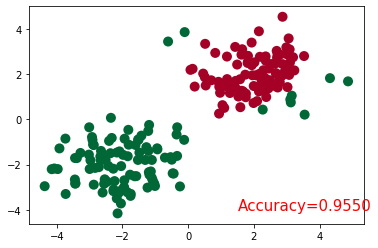

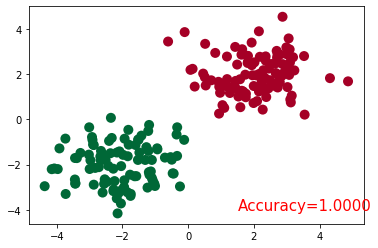

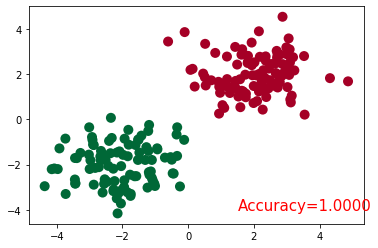

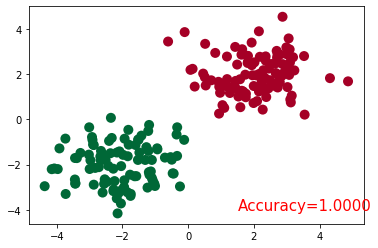

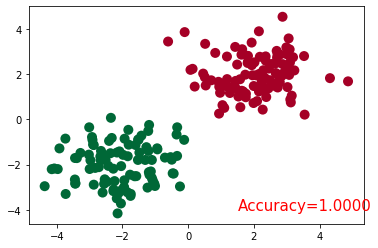

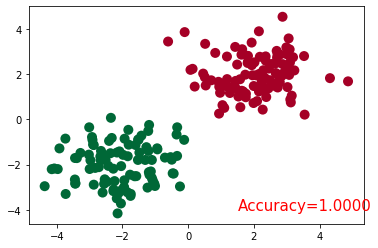

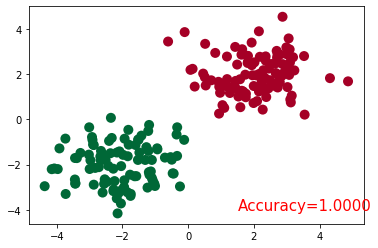

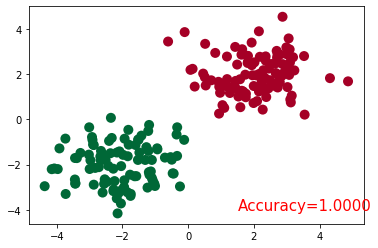

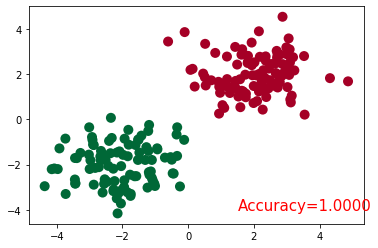

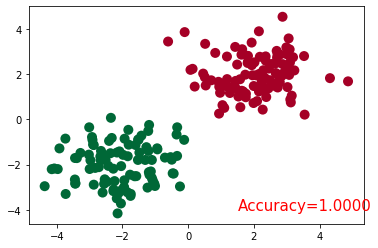

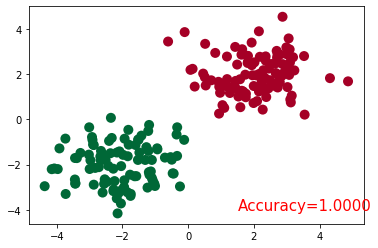

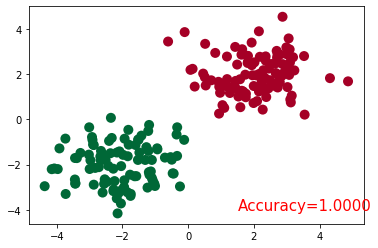

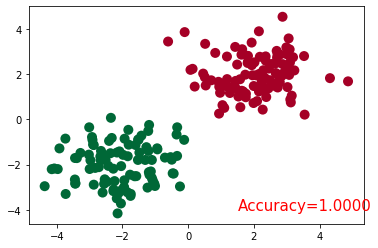

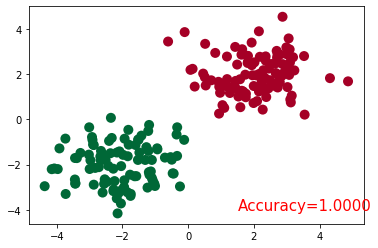

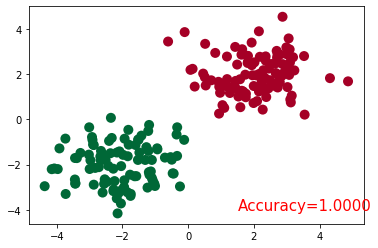

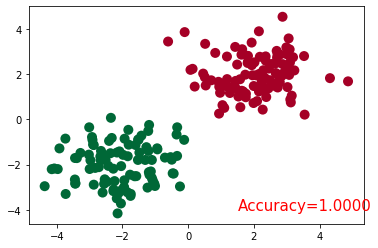

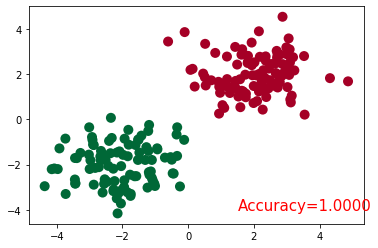

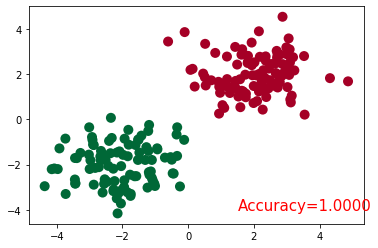

In [7]:
# 训练神经网络
import torch.nn.functional as F 

optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

# 可视化
plt.ion()
plt.show()

for t in range(100):
    out = net(x)
    loss = loss_func(out,y)
    # 清空上一步的参与更新参数值
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 5 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out),1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=100,lw=0,cmap='RdYlGn')
        accuracy = sum(pred_y==target_y)/200.
        plt.text(1.5,-4,'Accuracy=%.4f'%accuracy,fontdict={'size':15,'color':'red'})
        plt.pause(0.1)

# 停止画图
plt.ioff()
plt.show()